In [1]:
def set_dictionaries():
    '''
    This function is used to create the needed dictionaries for the function food_web_plot.

    Inputs: None

    Outputs: direction_dict (dictionary type object), position_dict (dictionary type object), edges_dict (dictionary type object)
    
    direction_dict is a dictionary of node connections using labels used to initialize the networkx graph.
    postiion_dict is a dictionary of node positions indexed by animal names as strings.
    edges_dict is a dictionary indexed by tuples (first_node, second_node). Each key stores the info "Missing Val!" to
        help indicate whether these values were updated later.
    '''
    #Creates a dictionary to use for the directions of edges in the Networkx Plot.
    direction_dict = {"Arctic Cod": ["Orca", "Leopard Seal"], 
                    "Orca": [], 
                    "Krill": ["Arctic Cod", "Orca", "Leopard Seal", "Baleen Whale", "Penguin"], 
                    "Penguin": ["Orca"], 
                    "Baleen Whale": [], 
                    "Leopard Seal": ["Orca"]}
    
    #Creates a dictionary to use for the locations of nodes in the Networkx Plot.
    position_dict = {"Arctic Cod": (1, 5), 
                    "Orca": (7, 4), 
                    "Krill": (3.5, 5.5), 
                    "Penguin": (5.75, 6.5), 
                    "Baleen Whale": (2, 8), 
                    "Leopard Seal": (6.5, 8)}

    #Creates a dictionary to use for edge labels (Place Holder Code)
    edges_dict = {} #Place Holder Code
    for i in direction_dict:
        for j in direction_dict[i]:
            edges_dict[(i, j)] = 'Missing Val!' #Place Holder Code

    #Returns the above dictionaries
    return direction_dict, position_dict, edges_dict





def generate_color_list(creatures):
    '''
    This function generates a list of color values for use in the food_web_plot function.

    Inputs: creatures (dictionary type object) with keys as animal names and values of numbers of those animals.

    Outputs: A list of values for the intensity of the colors of the nodes in the Networkx graph. 
    Each value being between 0 and 1 (inclusive).
    '''
    #Author Note, Update the denominator values when some testing is done
    arctic_cod_color = creatures["arctic cod"] / (2000 * 5)
    orca_color = creatures["orca"] / (10 * 5)
    krill_color = creatures["krill"] / (1.35e6 * 5)
    penguin_color = creatures["penguin"] / (1000 * 5)
    baleen_whale_color = creatures["baleen whale"] / (5 * 25)
    leopard_seal_color = creatures["leopard seal"] / (50 * 5)

    #Checks if invasive species has been added to the creatures dictionary and, if yes, adds a color for it to the color list.
    if "invasive species" in creatures:
        invasive_species_color = creatures["invasive_species"] / (1)
        color_list = [arctic_cod_color, orca_color, krill_color, penguin_color, balleen_whale_color, leopard_seal_color, plankton_color, invasive_species_color]
        for i in range(len(color_list)):
            if color_list[i] > 1:
                color_list[i] = 1

    else:
        color_list = [arctic_cod_color, orca_color, krill_color, penguin_color, balleen_whale_color, leopard_seal_color, plankton_color]
        for i in range(len(color_list)):
            if color_list[i] > 1:
                color_list[i] = 1

    return color_list






def food_web_plot(direction_dict, position_dict, edges_dict, node_color_list, *, 
                  node_size_list = [4500, 2000, 2000, 3000, 8000, 8000]):
    '''
    This function creates a Networkx graph.

    Inputs: direction_dict (dictionary type object), position_dict (dictionary type object), edges_dict (dictionary type object)
    This inputs are obtained from the set_dictionaries function, edges_dict is designed to be updated before use.
    node_color_array (list type object), is a list of values for the intensity of the colors of the nodes. It must be of
    the same length as the number of nodes in the Networkx graph and each value must be between 0 and 1.
    
    Optional Input of node_size_array (array type object with length == len(direction_dict). Changing this array is not recommended.

    Output: A visual of the input data graphed using Networkx. This function does not return anything, it only prints an image.
    '''
    #Plots the Networkx Graph
    G = nx.DiGraph(direction_dict)
    plt.figure(3,figsize=(12,7)) #Sets the figuresize
    nx.draw_networkx_edge_labels(G, pos = position_dict, edge_labels = edges_dict, verticalalignment = "bottom") #Plots edge labels
    nx.draw_networkx(G, pos = position_dict, node_size = node_size_list, cmap = "BuPu", node_color = node_color_list, vmin = 0, vmax = 1, alpha = 0.8) #Plots the nodes in white with locations

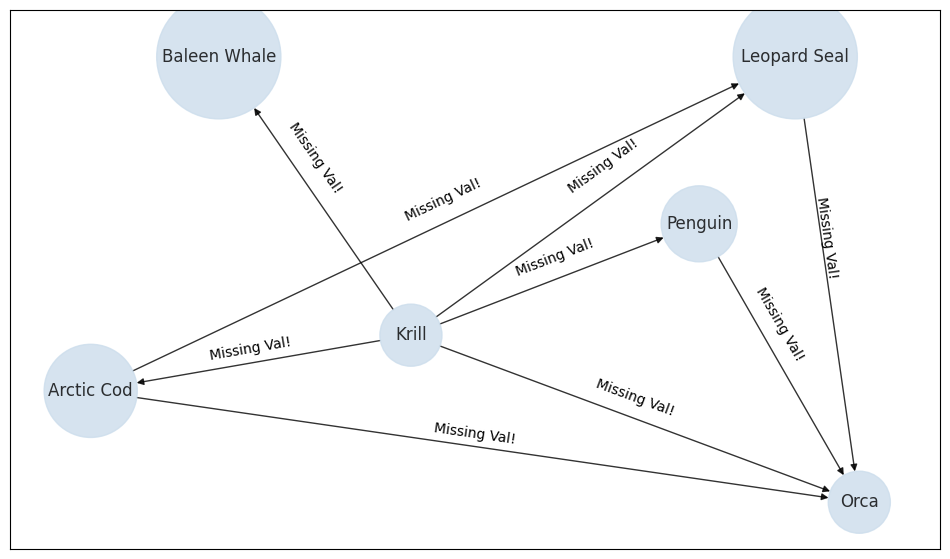

In [4]:
#Importing needed libraries
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

test_colors =[0.2, 0.2, 0.2, 0.2, 0.2, 0.2]
direction_dict, position_dict, edges_dict = set_dictionaries()
food_web_plot(direction_dict, position_dict, edges_dict, test_colors)

In [ ]:
plt.savefig("Ecosystem_Graph.png")